In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


np.set_printoptions(suppress=True)

import sklearn.metrics as metrics
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [39]:
df = pd.read_csv('whitewines.csv', sep=',', header=0)

In [40]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

In [41]:
train_features = train_data.drop('quality', axis=1)
train_labels = train_data['quality']
test_features = test_data.drop('quality', axis=1)
test_labels = test_data['quality']

In [42]:
train_features.shape

(3428, 11)

In [61]:
# Basic feedforward structure
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(11,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile 
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(1e-3),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

# Train
h = model.fit(
    x=train_features, 
    y = train_labels, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.1
)

Epoch 1/20
97/97 [==============================] - 1s 5ms/step - loss: 2.3660 - sparse_categorical_accuracy: 0.3546 - val_loss: 1.4420 - val_sparse_categorical_accuracy: 0.3353
Epoch 2/20
97/97 [==============================] - 0s 4ms/step - loss: 1.4659 - sparse_categorical_accuracy: 0.3883 - val_loss: 1.3789 - val_sparse_categorical_accuracy: 0.4431
Epoch 3/20
97/97 [==============================] - 0s 3ms/step - loss: 1.3635 - sparse_categorical_accuracy: 0.4301 - val_loss: 1.4277 - val_sparse_categorical_accuracy: 0.3994
Epoch 4/20
97/97 [==============================] - 0s 3ms/step - loss: 1.3569 - sparse_categorical_accuracy: 0.4214 - val_loss: 1.3781 - val_sparse_categorical_accuracy: 0.4198
Epoch 5/20
97/97 [==============================] - 0s 3ms/step - loss: 1.3289 - sparse_categorical_accuracy: 0.4259 - val_loss: 1.3206 - val_sparse_categorical_accuracy: 0.4286
Epoch 6/20
97/97 [==============================] - 0s 3ms/step - loss: 1.3322 - sparse_categorical_accuracy: 

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               1536      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 128)              

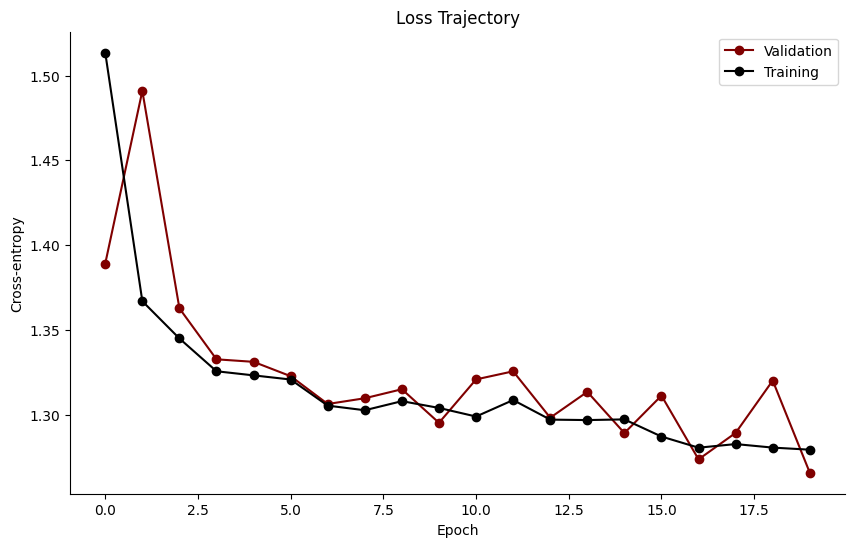

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(range(20), h.history['val_loss'], 'o-', color='maroon', label='Validation')
ax.plot(range(20), h.history['loss'], 'o-', color='black', label='Training')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross-entropy')
ax.legend()
ax.set_title('Loss Trajectory')
sns.despine(ax=ax)

In [54]:
test_loss, test_accuracy = model.evaluate(test_features, test_labels)

46/46 [==============================] - 0s 2ms/step - loss: 1.2406 - sparse_categorical_accuracy: 0.4537


In [55]:
test_accuracy

0.45374149084091187

46/46 [==============================] - 0s 2ms/step


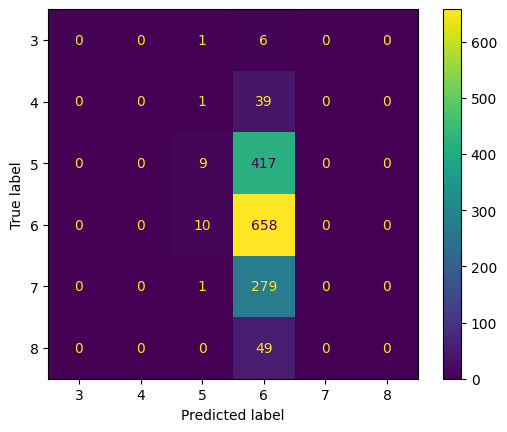

In [56]:
# More detailed evaluations
preds = model.predict(test_features)
metrics.ConfusionMatrixDisplay.from_predictions(test_labels, preds.argmax(axis=1))